In [64]:
# 1. Import Libraryimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [65]:
# 2. Load Data
df = pd.read_csv('students_performance.csv')

# Cek nama kolom
print("Kolom:", df.columns.tolist())


Kolom: ['Student_ID', 'Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']


In [66]:
# 3. Cek Kolom & Data Target
# Tampilkan semua kolom
print("Kolom:", df.columns.tolist())

# Cek nilai unik dan null pada Weekly_Study_Hours
print("Nilai unik Weekly_Study_Hours:", df['Weekly_Study_Hours'].unique())
print("Jumlah data sebelum drop NA:", len(df))


Kolom: ['Student_ID', 'Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']
Nilai unik Weekly_Study_Hours: [ 0  2 12  8]
Jumlah data sebelum drop NA: 145


In [67]:
# 4. Buat Label Target dari Weekly_Study_Hours
# Drop baris kosong di Weekly_Study_Hours
df = df.dropna(subset=['Weekly_Study_Hours'])

# Konversi ke numerik
df['Weekly_Study_Hours'] = pd.to_numeric(df['Weekly_Study_Hours'], errors='coerce')
df = df.dropna(subset=['Weekly_Study_Hours'])

# Label performa belajar: ≥10 jam per minggu = 1 (rajin), sisanya = 0
df['performance'] = df['Weekly_Study_Hours'].apply(lambda x: 1 if x >= 10 else 0)

# Cek jumlah data dan distribusi target
print("Jumlah data setelah filter:", len(df))
print("Distribusi target performance:\n", df['performance'].value_counts())


Jumlah data setelah filter: 145
Distribusi target performance:
 performance
0    124
1     21
Name: count, dtype: int64


In [68]:
# 5. Persiapan Data untuk Modeling
X = df.drop(['Student_ID', 'performance'], axis=1)
y = df['performance'].astype(int)  # pastikan integer, bukan object/string

# Encode kolom kategorikal
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

# Cek ulang X dan y
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique labels:", y.unique())


X shape: (145, 14)
y shape: (145,)
Unique labels: [0 1]


In [69]:
# 6. Split Data (dengan stratify=y)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [70]:
# 7 Modeling dan Prediksi
# 7.1 Decision Tree Classifier
# Buat dan latih model Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_tree = tree_model.predict(X_test)


In [71]:
# 7.2 Logistic Regression
# Buat dan latih model Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_log = log_model.predict(X_test)


In [72]:
# 8. Evaluasi Model
# 8.1 Fungsi Evaluasi
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("Akurasi:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))


In [73]:
# 8.2 Evaluasi untuk Kedua Model
evaluate_model("Decision Tree", y_test, y_pred_tree)
evaluate_model("Logistic Regression", y_test, y_pred_log)



Model: Decision Tree
Akurasi: 1.0
Confusion Matrix:
 [[38  0]
 [ 0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00         6

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44


Model: Logistic Regression
Akurasi: 1.0
Confusion Matrix:
 [[38  0]
 [ 0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00         6

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



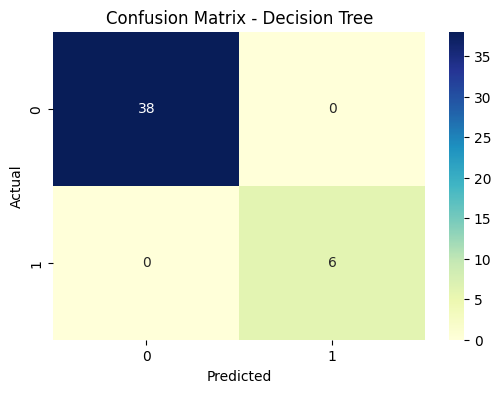

In [74]:
# 9 Visualisasi Confusion Matrix
# 9.1 Untuk Decision Tree
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


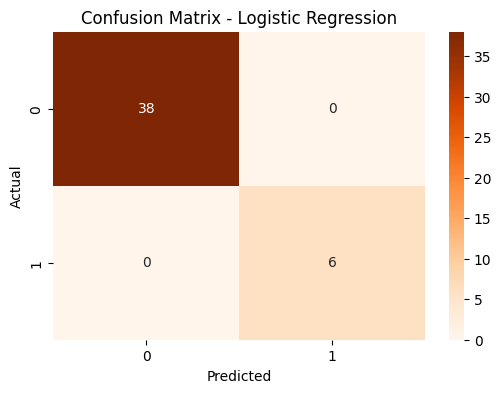

In [75]:
# 9.2 Untuk Logistic Regression
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
